CS249 -- Spring 2016 -- D.S. Parker &copy; 2016

# HW0:  Fitting Distributions with Maximum Likelihood

<p style="color:blue;">
Problem:  given a sequence of random real values, attempt to determine which distribution it follows.
<br/><br/>
More specifically, develop a program that reads in a numeric table, and --
for each dataset in the table (where each column in the table is a "dataset")
-- determines the distribution and parameters that gives the closest match to it.
<br/><br/>
For simplicity, the parameters used in this assignment will always be integers,
so the printed output should always have integer parameter values.
</p>

## fitdistr

You can use the "fitdistr" function in the MASS library
to fit distributions to data.


In [47]:
not.installed <- function(pkg) !is.element(pkg, installed.packages()[,1])

if (not.installed("MASS"))  install.packages("MASS")  # we need the MASS package

library(MASS)  #  load the MASS package

#  ?fitdistr      #  look at the help for the fitdistr function

##  Generate a sample table with 6 columns (datasets)

The table is of size (N x 6), where N=10000.
Each column in this dataset is a random sample from a different distribution.

In [48]:
# We generate a table whose _columns_ are random samples from different distributions.

# Each sample is of size N:

N = 10000

D1 = rgamma( N, 9, 2 )
D2 = rnorm( N, 4, 2 )
D3 = rlnorm( N, 0, 1 )
D4 = rexp( N, 1 )
D5 = rchisq( N, 5 )
D6 = rlogis( N, 3, 2 )

# All parameter values in this assignment will be integers !

Table = round(cbind( D1,D2,D3,D4,D5,D6 ),8)

colnames(Table) = c("D1","D2","D3","D4","D5","D6")

# print the first few lines of the (N x 6) table:

head(Table)


D1,D2,D3,D4,D5,D6
4.53256780,4.12387032,1.46654007,0.07384185,4.14580352,6.21513567
7.1378018,6.8581740,0.2379494,0.1476523,5.3174948,3.1291521
3.3713903,6.2437282,0.2138276,0.1699299,1.5583491,0.6543210
2.7725880,5.5875745,0.4583172,0.3767378,2.8429449,1.9559299
7.2775941,5.2902876,0.9740191,2.6121070,5.9899608,6.7003783
8.7408465,2.7770890,2.7271062,0.5956197,2.3983975,8.8628316


## Histograms permit visualization of each column/sample in the Table

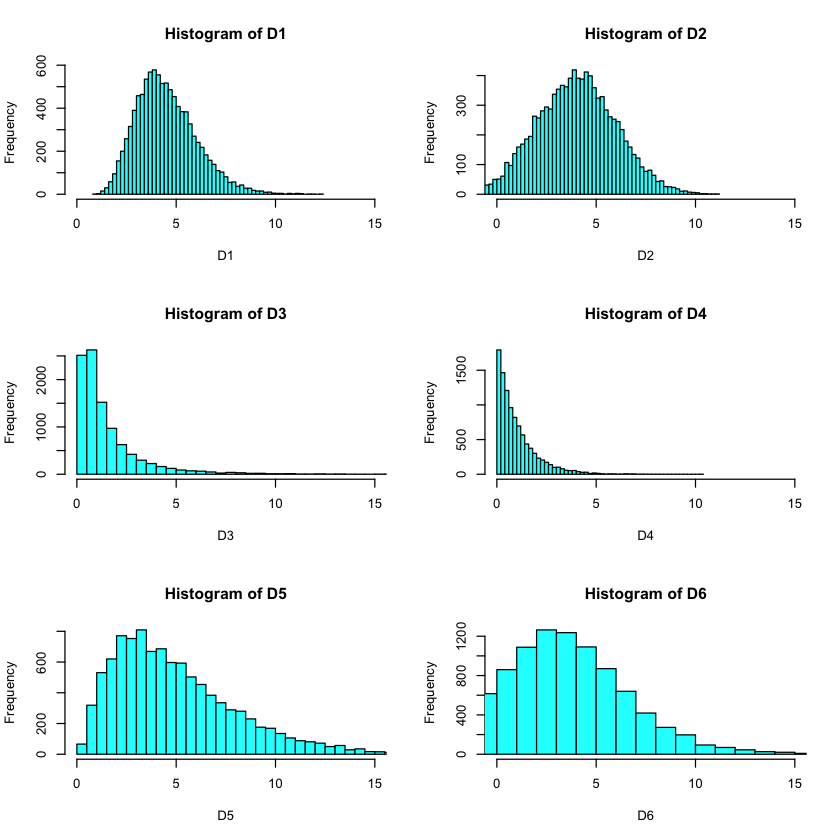

In [52]:
opar = par(mfrow = c(3,2))  # make a 3x2 grid of plots

# make 3 rows of plots, with 2 plots per row

B=60
hist( D1, col="cyan", xlim=c(0,15), breaks=B )
hist( D2, col="cyan", xlim=c(0,15), breaks=B )
hist( D3, col="cyan", xlim=c(0,15), breaks=B )
hist( D4, col="cyan", xlim=c(0,15), breaks=B )
hist( D5, col="cyan", xlim=c(0,15), breaks=B )
hist( D6, col="cyan", xlim=c(0,15), breaks=B )

par(opar)  # restore previous values of plotting parameters

## Your program should handle these kinds of distributions:

In [50]:
Distribution_name = c(
    "normal",
    "t",
    "chi-squared",
    "lognormal",
    "exponential",
    "gamma",
    "logistic"
)

Distribution_can_have_negative_values = c(
    TRUE,
    TRUE,
    FALSE,
    FALSE,
    FALSE,
    FALSE,
    TRUE
)

Distribution_function = c(
    dnorm,
    dt,
    dchisq,
    dlnorm,
    dexp,
    dgamma,
    dlogis
)

Distribution_color = c(
    "blue",
    "cyan",
    "green",
    "gold",
    "magenta",
    "red",
    "purple"
)

add_curve = function( dist_name, p ) {
    if (dist_name == "normal")      curve( dnorm(x, p[1], p[2] ),    col="blue",   lwd=2, add=TRUE )
    if (dist_name == "t")           curve( dt(x, p[1], p[2], p[3] ), col="cyan",   lwd=2, add=TRUE )
    if (dist_name == "chi-squared") curve( dnorm(x, p[1] ),          col="green",  lwd=2, add=TRUE )
    if (dist_name == "lognormal")   curve( dlnorm(x, p[1], p[2] ),   col="gold",   lwd=2, add=TRUE )
    if (dist_name == "exponential") curve( dexp(x, p[1] ),           col="magenta",lwd=2, add=TRUE )
    if (dist_name == "gamma")       curve( dgamma(x, p[1], p[2] ),   col="red",    lwd=2, add=TRUE )
    if (dist_name == "logistic" )   curve( dlogis(x, p[1], p[2] ),   col="purple", lwd=2, add=TRUE )
}

## Sample analysis of the data in R, with fitdistr:


trying Dataset 1:
Dataset is nonnegative
normal 5 2
               log-likelihood = -18341.937944
t 4 1 13
               log-likelihood = -18287.940947
chi-squared 5
               log-likelihood = -20955.815656
lognormal 1 0
               log-likelihood = -17986.331880
exponential 0
               log-likelihood = -25061.397949
gamma 9 2
               log-likelihood = -17916.670936
logistic 4 1
               log-likelihood = -18318.684765

trying Dataset 2:
Dataset has some negative values, so it cannot follow nonnegative distributions


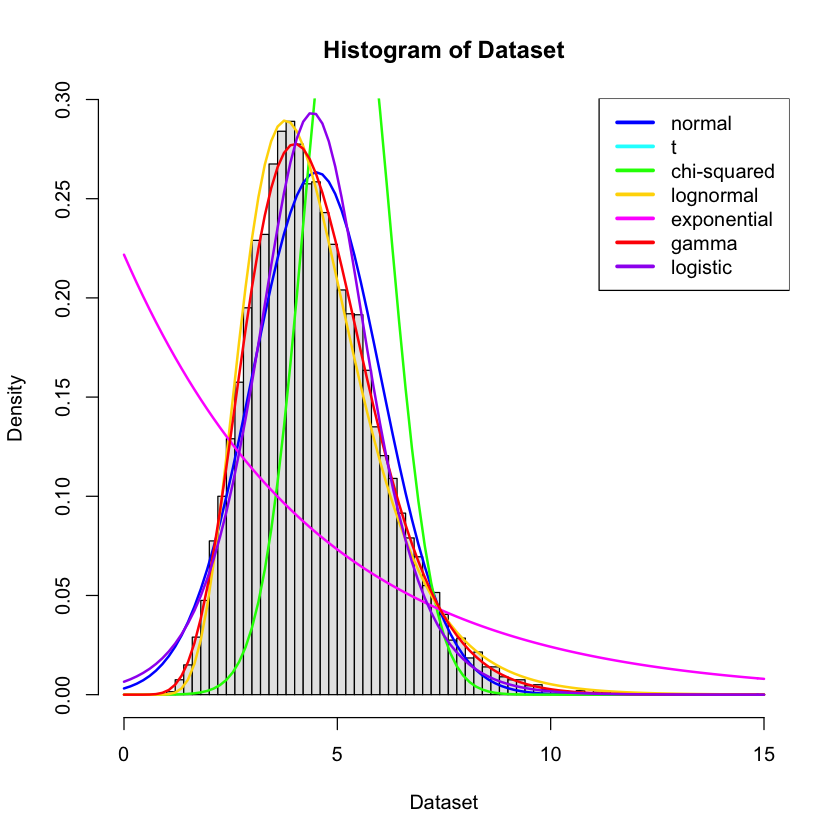

normal 4 2
               log-likelihood = -21145.908478
t 4 2 73
               log-likelihood = -21149.296562
logistic 4 1
               log-likelihood = -21253.423182

trying Dataset 3:
Dataset is nonnegative


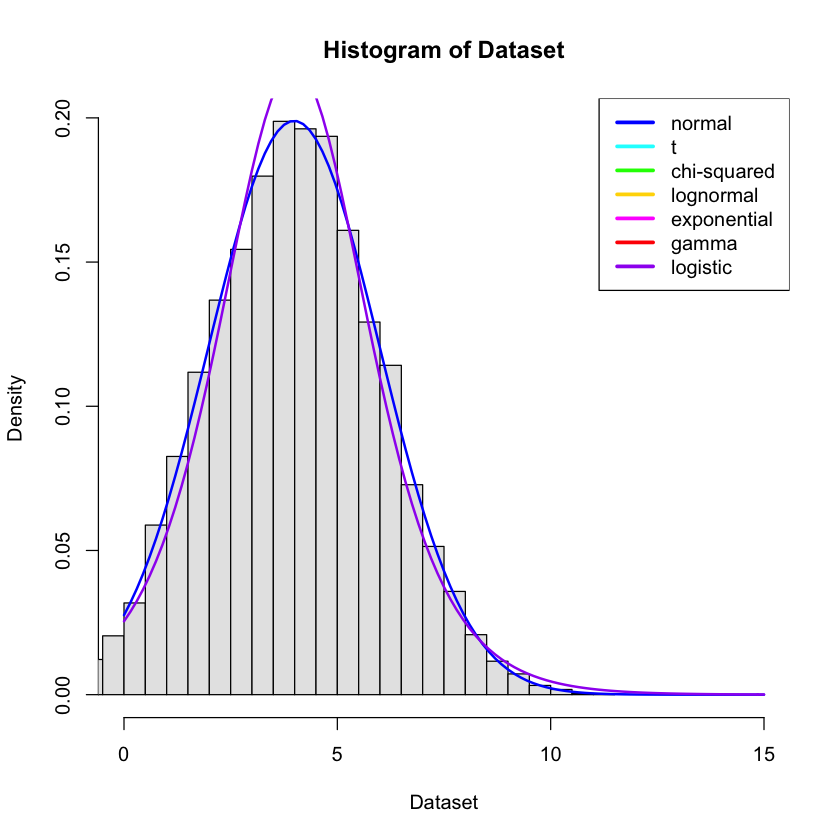

normal 2 2
               log-likelihood = -21597.612168
t 1 1 1
               log-likelihood = -16698.716736
chi-squared 2
               log-likelihood = -14942.206866
lognormal 0 1
               log-likelihood = -13934.857839
exponential 1
               log-likelihood = -14778.392531
gamma 1 1
               log-likelihood = -14721.341610
logistic 1 1
               log-likelihood = -18728.957856

trying Dataset 4:
Dataset is nonnegative


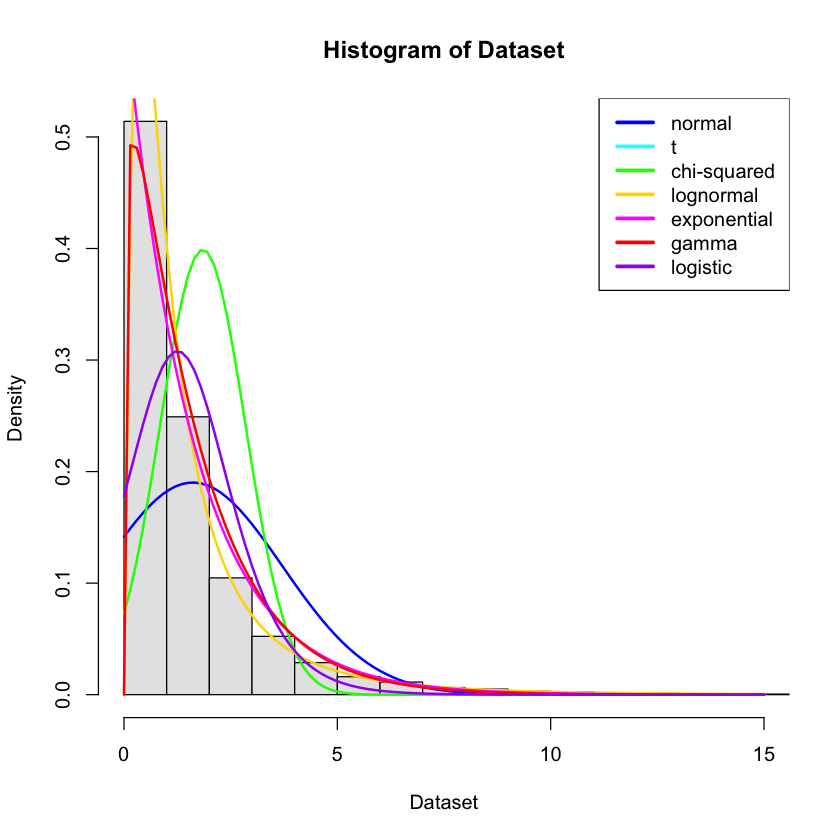

normal 1 1
               log-likelihood = -14248.606034
t 1 1 3
               log-likelihood = -13103.567454
chi-squared 1
               log-likelihood = -10824.495582
lognormal -1 1
               log-likelihood = -11099.145141
exponential 1
               log-likelihood = -10123.494203
gamma 1 1
               log-likelihood = -10123.493032
logistic 1 1
               log-likelihood = -13465.695558

trying Dataset 5:
Dataset is nonnegative


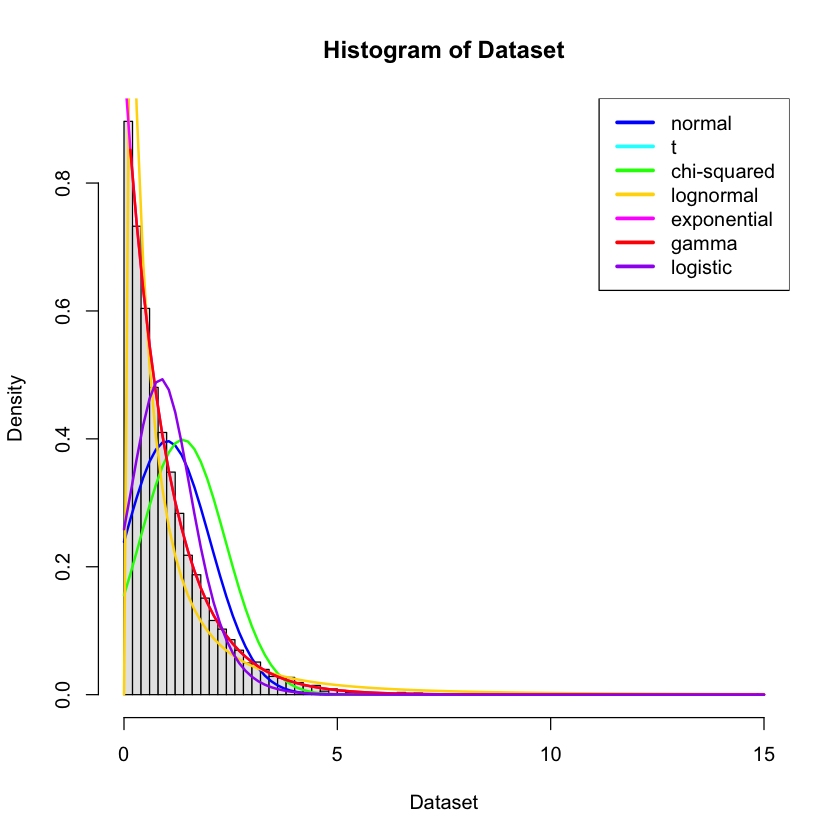

normal 5 3
               log-likelihood = -25768.940694
t 5 3 6
               log-likelihood = -25487.619038
chi-squared 5
               log-likelihood = -24274.332114
lognormal 1 1
               log-likelihood = -24585.026963
exponential 0
               log-likelihood = -26093.799784
gamma 2 0
               log-likelihood = -24273.951478
logistic 5 2
               log-likelihood = -25516.785583

trying Dataset 6:
Dataset has some negative values, so it cannot follow nonnegative distributions


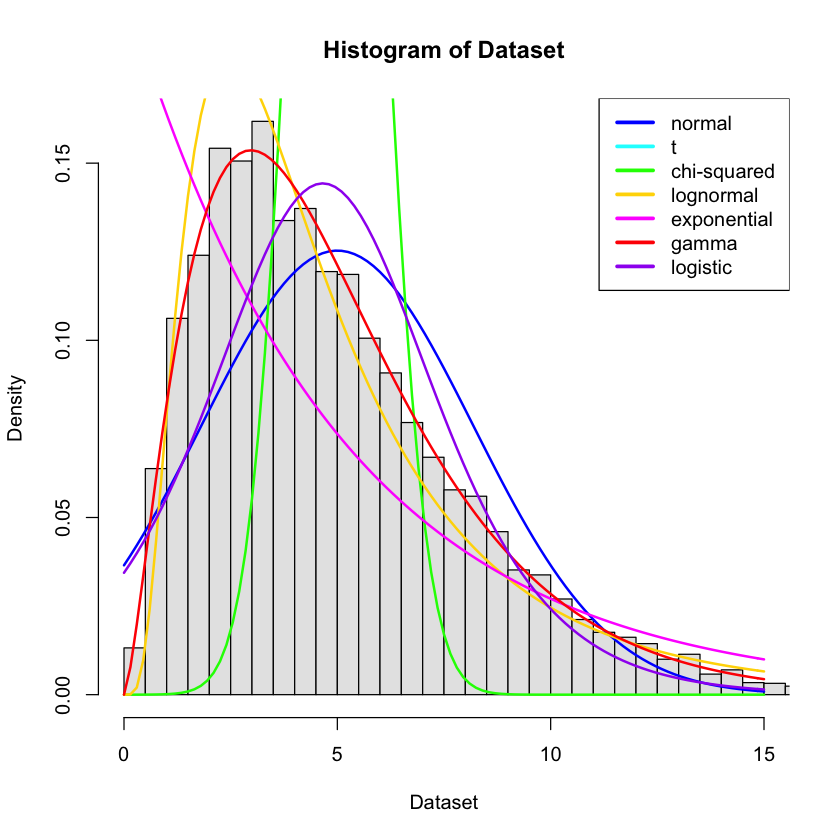

normal 3 4
               log-likelihood = -27163.454578
t 3 3 6
               log-likelihood = -26947.991305
logistic 3 2
               log-likelihood = -26950.184779


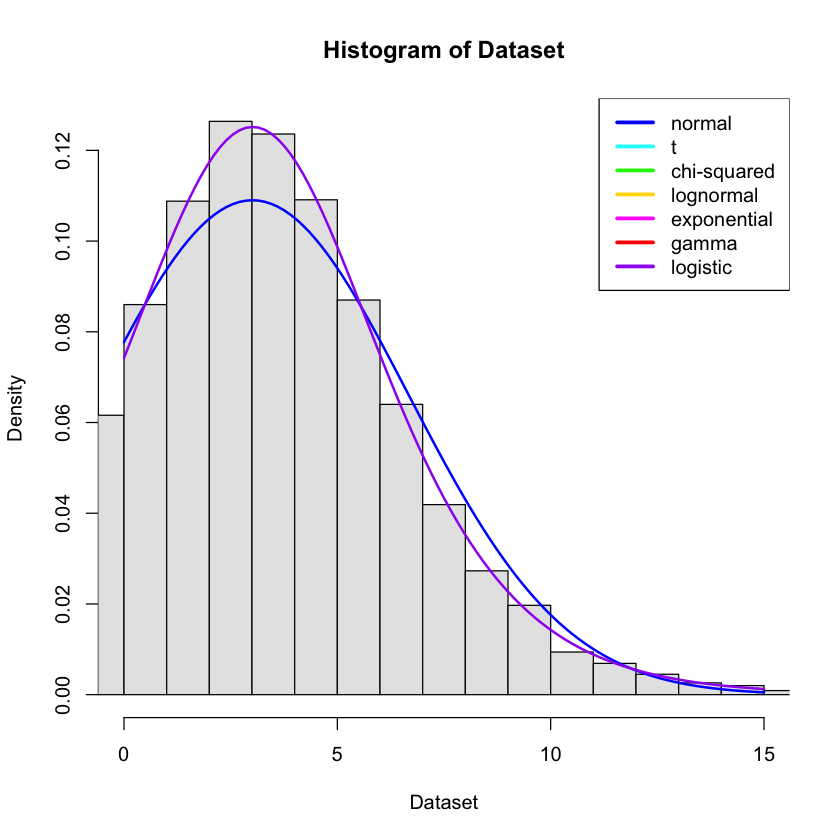

In [51]:
n = nrow(Table)
p = ncol(Table)

for (j in 1:p) {
    Dataset = Table[,j]   #  j-th dataset = j-th column of the data table
    cat(sprintf("\ntrying Dataset %d:\n", j))
    
    Dataset_is_nonnegative = !any( Dataset < 0 )
    if (Dataset_is_nonnegative) {
        cat("Dataset is nonnegative\n")
    } else {
        cat("Dataset has some negative values, so it cannot follow nonnegative distributions\n")
    }

    hist( Dataset, col="gray90", xlim=c(0,15), breaks=50, probability=TRUE )
    
    # display a histogram for each column Dataset
    
    legend( "topright", Distribution_name, col=Distribution_color, lwd=3 )

    for (i in 1:length(Distribution_name)) {
        dist_name = Distribution_name[i]
        if (Distribution_can_have_negative_values[i] || Dataset_is_nonnegative) {
            # don't fit a nonnegative distribution to data that is negative

            if (dist_name == "chi-squared") {  # fitdistr requires special handling of chi-squared
                fit = suppressWarnings( fitdistr( Dataset, dist_name,
                                                 list(df=round(mean(Dataset))), method="BFGS" ) )
            } else {
                fit = suppressWarnings( fitdistr( Dataset, dist_name ) )
            }

            # "fit" is the object returned by fitdistr, describing the fit

            fitted_parameters = fit$estimate
            log_likelihood = fit$loglik

            parameter_value_string = paste(round(fitted_parameters), collapse=" ")
            # we round the parameter values so that they are integers.

            # This is what the output is supposed to look like:
            cat(sprintf("%s %s\n", dist_name, parameter_value_string))  

            # To show how good the fit is, we also print the log-likelihood here
            cat(sprintf("               log-likelihood = %f\n", log_likelihood))
            
            add_curve( dist_name, fitted_parameters )  # show the fit on the histogram

            # The optimal distribution is the one with maximum-likelihood
            #  (and:  maximum-likelihood == maximum-log-likelihood).
            # Your program needs to determine which distribution maximizes this.
        }
    }
}


# Problem:   Fit a distribution to each input dataset.

Specifically:

# 1.  Generalize the program above to handle ANY input table ...... and also handle the Beta and Weibull distributions.

<p style="color:blue;">
These distributions are supported by fitdistr.
<br/><br/>
Note: values from the Beta distribution are always in the interval [0,1],
so any input data that goes outside this range cannot be from the Beta distribution.
<br/><br/>
Your program does <i>not</i> have to handle
the F distribution, Negative Binomial distribution, Poisson distribution, etc.
</p>

### Your R program can be an extension of this outline:

<pre>
#  Read in a table (in csv format) from standard input:
Table = data.matrix(read.csv( file("stdin"), header=TRUE ))


Distribution = c( "normal", "t", "chi-squared", "lognormal", "exponential", "gamma", "logistic", .........................................)
  # include other distributions here

Distribution_can_have_negative_values = c( TRUE, TRUE, FALSE, FALSE, FALSE, FALSE, TRUE, .................................)

for (j in 1:ncol(Table)) {
    Dataset = Table[,j]        #  j-th dataset = the j-th column of the table
    Dataset_is_nonnegative = !any( Dataset < 0 )

    for (i in 1:length(Distribution)) {
        dist_name = Distribution[i]
        if (Distribution_can_have_negative_values[i] || Dataset_is_nonnegative) {
            # do not try to fit a nonnegative distribution to data that is negative

            if (dist_name == "chi-squared") {
                # fitdistr requires special handling of chi-squared
                fit = suppressWarnings( fitdistr( Dataset, dist_name,
                                  list(df=round(mean(Dataset))), method="BFGS" ) )
            } else {
                fit = suppressWarnings( fitdistr( Dataset, dist_name ) )
            }

            fitted_parameters = fit$estimate
            log_likelihood = fit$loglik
            
            parameter_value_string = paste(round(fitted_parameters), collapse=" ")
            # print integer parameters
            cat(sprintf("%s %s\n", dist_name, parameter_value_string))

            # The optimal distribution is the one with maximum-likelihood
            #  (and:  maximum-likelihood == maximum-log-likelihood).
            # The optimal distribution needs to be tracked here .............
        }
    }
}
</pre>


# 2.  The output of your program should be a CSV file "HW0_output.csv" 

## Your output CSV file "HW0_output.csv" should look like this:
<p style="color:blue;">
If your program had been given the Table above as input,
it should print the following CSV file, a table with six rows, and FOUR columns:
</p>
<pre>
gamma,9,2,
normal,4,2,
lognormal,0,1,
exponential,1,,
chi-squared,5,,
logistic,3,2,
</pre>
<p style="color:blue;">
<i>There should be NO header line in this file.</i>
<br/><br/>
Each row has FOUR fields:  distribution name, and at most three parameter values.
(The $t$ distribution takes 3 parameter values, for example.)
<br/><br/>
If the input table has <i>p</i> columns (i.e., <i>p</i> random samples),
the output file should have <i>p</i> rows.
<br/><br/>
The parameters in this assignment will always be integers,
so the printed output should always have integer parameter values.
</p>

# 3. Run your program using the file "HW0_test.csv" as input.

# 4. Submit your output CSV file and revised notebook on CCLE.
<p style="color:blue;">
Upload your .ipynb and your .csv file for Assignment "HW0".  Both are required.
</p>

# We will use Paul Eggert's Late Policy:
# N days late ==>  2^N points deducted.
<p style="color:blue;">
The number of Days late is N=0 for the first 24 hrs, N=1 for the next 24 hrs, etc.
So if you submit an assignment H hours late, 2^floor(H/24) points are deducted.
</p>


# Solution : Fit a distribution to each input dataset.

In [1]:
library(MASS)

#  Read in a table (in csv format) from standard input:
Table = data.matrix(read.csv( file("HW0_test.csv"), header=TRUE ))

Distribution = c( "normal", "t", "chi-squared", "lognormal", "exponential", "gamma", "logistic", "beta", "weibull")
Distribution_can_have_negative_values = c( TRUE, TRUE, FALSE, FALSE, FALSE, FALSE, TRUE, FALSE, FALSE)
Distribution_function = c( dnorm, dt, dchisq, dlnorm, dexp, dgamma, dlogis,dbeta, dweibull)

if(file.exists("HW0_output.csv")){
    file.remove("HW0_output.csv")
}

# loop through each dataset and find appropriate fit(ML)
for (j in 1:ncol(Table)) {
    max_likelihood= -Inf
    Fitted_distribution=" "
    parameter_value_string=" "
    ans_to_csv=""
    comma=","

    Dataset = Table[,j]        #  j-th dataset = the j-th column of the table
    Dataset_is_nonnegative = !any( Dataset < 0 )
    Dataset_is_out_of_range_0_And_1= Dataset_is_nonnegative & any(Dataset > 1)

    for (i in 1:length(Distribution)) {
        dist_name = Distribution[i]

        # do not try to fit a nonnegative distribution to data that is negative
        if (Distribution_can_have_negative_values[i] || Dataset_is_nonnegative) {
           # fitdistr requires special handling of chi-squared
            if (dist_name == "chi-squared") {
                fit = suppressWarnings( fitdistr( Dataset, dist_name, list(df=3), method="BFGS") )
            } 
            else if(dist_name == "beta") {
                if(!Dataset_is_out_of_range_0_And_1)
                    fit = suppressWarnings( fitdistr( Dataset, dist_name, list(shape1=1,shape2=1)))
                else
                    next
            }
            else {
                fit = suppressWarnings( fitdistr( Dataset, dist_name ) )
            }

            fitted_parameters = fit$estimate
            log_likelihood = round(fit$loglik)
            
            # store integer parameters if the likelihood is maximum till now
            if (log_likelihood > max_likelihood){
                max_likelihood = log_likelihood
                Fitted_distribution = dist_name
                parameter_value_string = paste(round(fitted_parameters), collapse=",")
                ans_to_csv = paste(Fitted_distribution,parameter_value_string,sep=",")
                if(Fitted_distribution != "t")
                    ans_to_csv = paste(ans_to_csv,",",sep="",collapse="")
                if(Fitted_distribution == "chi-squared" | Fitted_distribution == "exponential")
                    ans_to_csv = paste(ans_to_csv,",",sep="",collapse="")
           }
        }
    }

    # Output distribution to csv file and console
    cat(sprintf("%s \n",ans_to_csv))
    cat(ans_to_csv,file = "HW0_output.csv", sep = "\n", append = TRUE)
}

[1] TRUE

lognormal,2,2, 
beta,7,2, 
normal,5,4, 
weibull,2,2, 
t,3,1,1 
exponential,3,, 
